In [2]:
!pip install keras

  Using cached Keras-2.1.2-py2.py3-none-any.whl


In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

565248/550378 [==============================] - 0s 0us/step
???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [10]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Use built-in Keras Functions

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Build Model with 46 Output Labels

In [39]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 149us/step - loss: 2.5929 - acc: 0.5698 - val_loss: 1.7981 - val_acc: 0.6680
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.4549 - acc: 0.7276 - val_loss: 1.3191 - val_acc: 0.7340
Epoch 3/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.0484 - acc: 0.7915 - val_loss: 1.1076 - val_acc: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.8149 - acc: 0.8393 - val_loss: 0.9981 - val_acc: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.6558 - acc: 0.8732 - val_loss: 0.9227 - val_acc: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.5368 - acc: 0.8949 - val_loss: 0.8774 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.4444 - acc: 0.9107 - val_loss: 0.8461 - val_acc: 0.8220


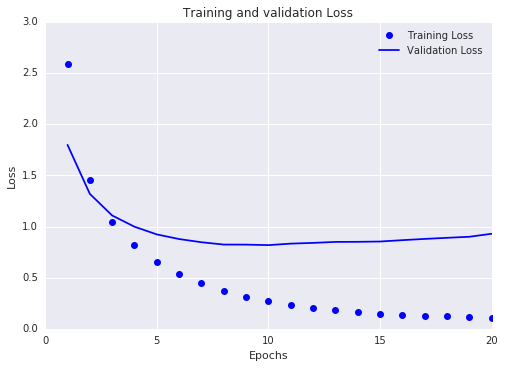

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

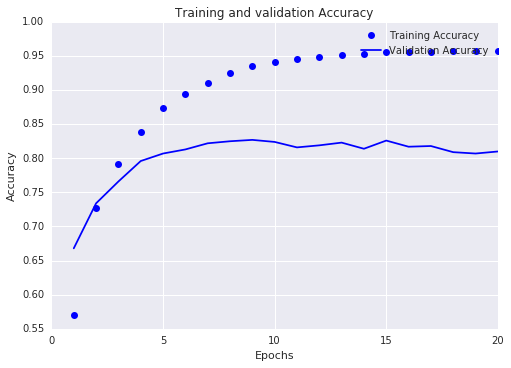

In [43]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Retrain with New number of Epochs

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, one_hot_train_labels, epochs=11, batch_size=512)

model.evaluate(x_test, one_hot_test_labels)

Epoch 1/11
8982/8982 [==============================] - 2s 198us/step - loss: 2.4428 - acc: 0.5332
Epoch 2/11
8982/8982 [==============================] - 2s 195us/step - loss: 1.3238 - acc: 0.7161
Epoch 3/11
8982/8982 [==============================] - 2s 195us/step - loss: 0.9758 - acc: 0.7867
Epoch 4/11
8982/8982 [==============================] - 2s 194us/step - loss: 0.7592 - acc: 0.8381
Epoch 5/11
8982/8982 [==============================] - 2s 192us/step - loss: 0.5984 - acc: 0.8762
Epoch 6/11
8982/8982 [==============================] - 2s 193us/step - loss: 0.4768 - acc: 0.9002
Epoch 7/11
8982/8982 [==============================] - 2s 195us/step - loss: 0.3847 - acc: 0.9175
Epoch 8/11
8982/8982 [==============================] - 2s 195us/step - loss: 0.3088 - acc: 0.9348
Epoch 9/11
8982/8982 [==============================] - 2s 193us/step - loss: 0.2598 - acc: 0.9413
Epoch 10/11
8982/8982 [==============================] - 2s 193us/step - loss: 0.2225 - acc: 0.9466
Epoch 11/

[0.996345554519103, 0.79474621549421198]

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

0.99999988

In [26]:
np.argmax(predictions, axis=0)

array([ 780, 1013, 1072, 1658,   45, 1779,   27, 1228,  882, 1770, 1490,
        897,  717,  136, 1779,  896, 1761,  159, 2091,   73,  695,  917,
       1768,  761,  541, 1105, 1058, 1351, 1251, 1308, 1592, 1569,  875,
       1147,  548,  189, 2001,  543,  376,  822,  487,  100,  744, 1144,
       1492, 2046])

Changed from one-hot to normal array, loss becomes sparse_categorical_crossentropy

In [44]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=11, batch_size=512)

model.evaluate(x_test, y_test)

Epoch 1/11
8982/8982 [==============================] - 3s 357us/step - loss: 2.6231 - acc: 0.5734
Epoch 2/11
8982/8982 [==============================] - 3s 314us/step - loss: 1.4792 - acc: 0.7305
Epoch 3/11
8982/8982 [==============================] - 3s 311us/step - loss: 1.0512 - acc: 0.7933
Epoch 4/11
8982/8982 [==============================] - 3s 307us/step - loss: 0.8047 - acc: 0.8432
Epoch 5/11
8982/8982 [==============================] - 3s 308us/step - loss: 0.6382 - acc: 0.8779
Epoch 6/11
8982/8982 [==============================] - 3s 313us/step - loss: 0.5171 - acc: 0.9001
Epoch 7/11
8982/8982 [==============================] - 3s 310us/step - loss: 0.4268 - acc: 0.9149
Epoch 8/11
8982/8982 [==============================] - 3s 317us/step - loss: 0.3569 - acc: 0.9292
Epoch 9/11
8982/8982 [==============================] - 3s 311us/step - loss: 0.3014 - acc: 0.9348
Epoch 10/11
8982/8982 [==============================] - 3s 316us/step - loss: 0.2584 - acc: 0.9415
Epoch 11/

[0.88329296863620443, 0.8023152270703473]